In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [6]:
if df.select_dtypes(include=['object']).columns.size > 0:
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])

In [7]:
X = df[['EstimatedSalary']]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

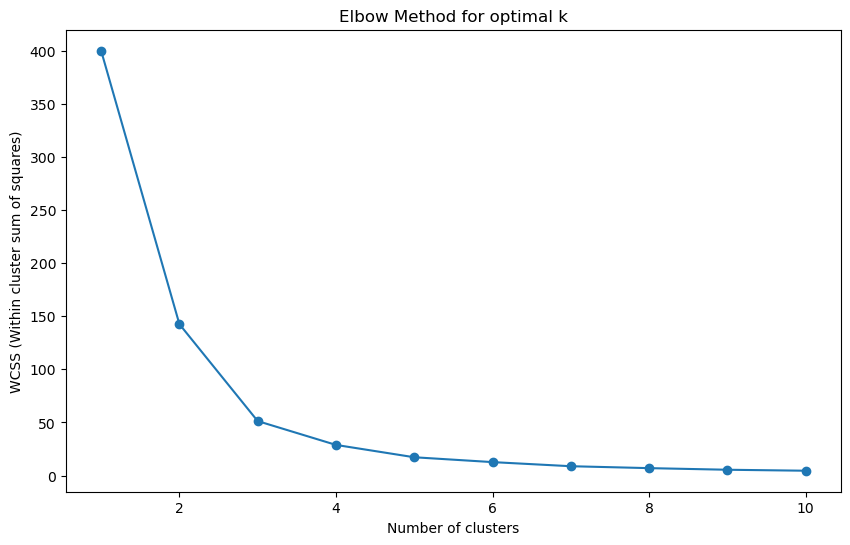

In [11]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',n_init=10,random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within cluster sum of squares)')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state = 42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


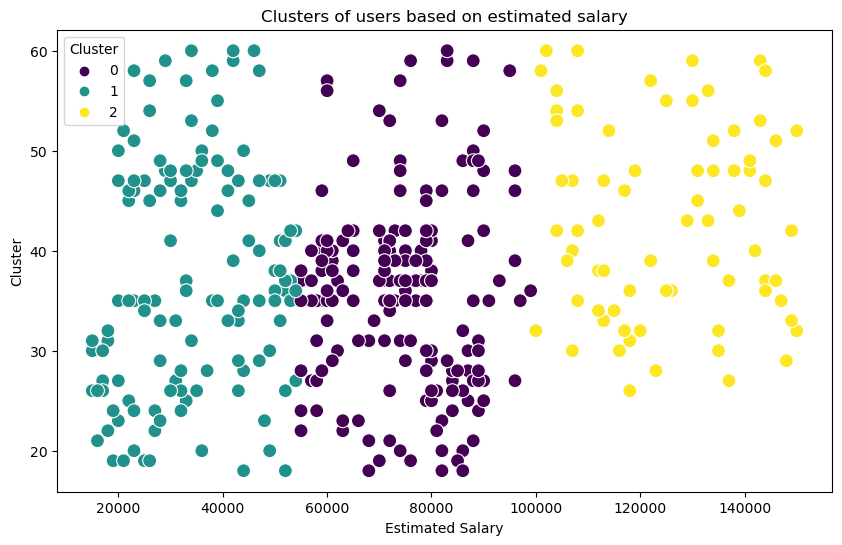

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df ,x = 'EstimatedSalary',y='Age',hue='Cluster',palette='viridis',s=100)
plt.title('Clusters of users based on estimated salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()